<a href="https://colab.research.google.com/github/maduakordavid01-ui/O.Rproject/blob/main/Copy_of_C%C3%B3pia_de_temperature_and_irradiance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from datetime import datetime, timedelta
%pip install cdsapi
%pip install netcdf4
import cdsapi
import xarray as xr
import pandas as pd
!pip install pvlib


In [2]:
dataset = "cams-gridded-solar-radiation"
request = {
    "variable": [
        "global_horizontal_irradiation",
        "direct_horizontal_irradiation",
        "diffuse_horizontal_irradiation",
        "direct_normal_irradiation"
    ],
    "sky_type": ["clear"],
    "version": ["4.6"],
    "year": ["2020"],
    "month": ["06"],
    "area": [44.5, -10, 36, 3.5]
}

client = cdsapi.Client(url='https://ads.atmosphere.copernicus.eu/api', key='1d12ba7d-1579-461e-9f07-608325392a05', verify=False)
client.retrieve(dataset, request).download()


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
2026-01-18 20:17:20,578 INFO

f4552bf3c0f26eedcee8a30238f3742b.zip:   0%|          | 0.00/26.1M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'object-store.os-api.cci2.ecmwf.int'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'f4552bf3c0f26eedcee8a30238f3742b.zip'

In [3]:
dataset = "cams-global-reanalysis-eac4-monthly"
request = {
    "variable": ["2m_temperature"],
    "year": ["2020"],
    "month": ["06"],
    "product_type": ["monthly_mean"],
    "data_format": "grib",
    "area": [90, -180, -90, 180]
}


client = cdsapi.Client(url='https://ads.atmosphere.copernicus.eu/api', key='1d12ba7d-1579-461e-9f07-608325392a05', verify=False)
client.retrieve(dataset, request).download()

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
2026-01-18 20:18:00,491 INFO

b83abf7f1f10e090fdf79a8e5b64b7dc.grib:   0%|          | 0.00/226k [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'object-store.os-api.cci2.ecmwf.int'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'b83abf7f1f10e090fdf79a8e5b64b7dc.grib'

In [4]:
!pip install -U xarray cfgrib eccodes pandas


In [5]:
import xarray as xr
import pandas as pd

In [6]:
#import xarray as xr
#!pip install xarray cfgrib eccodes pandas
ds = xr.open_dataset(
    'b83abf7f1f10e090fdf79a8e5b64b7dc.grib',
    engine='cfgrib')
df_temperature = ds.to_dataframe()
df_temperature.to_csv('output_temperature.csv', index=True)


In [7]:
df_temperature

number       time   step  surface valid_time         t2m
latitude longitude                                                          
 90.0    -180.00         0 2020-06-01 0 days      0.0 2020-06-01  273.570251
         -179.25         0 2020-06-01 0 days      0.0 2020-06-01  273.570251
         -178.50         0 2020-06-01 0 days      0.0 2020-06-01  273.570251
         -177.75         0 2020-06-01 0 days      0.0 2020-06-01  273.570251
         -177.00         0 2020-06-01 0 days      0.0 2020-06-01  273.570251
...                    ...        ...    ...      ...        ...         ...
-90.0     176.25         0 2020-06-01 0 days      0.0 2020-06-01  223.664017
          177.00         0 2020-06-01 0 days      0.0 2020-06-01  223.664017
          177.75         0 2020-06-01 0 days      0.0 2020-06-01  223.664017
          178.50         0 2020-06-01 0 days      0.0 2020-06-01  223.664017
          179.25         0 2020-06-01 0 days      0.0 2020-06-01  223.664017

[115680 rows x 6 columns]

In [8]:
!pip install cartopy
import cartopy

In [11]:
# Carrega o arquivo NetCDF usando xarray
ds_BHI = xr.open_dataset('v4.6_BHI_clear_2020_06.area-subset.44.5.3.5.36.-10.nc', engine='h5netcdf')
ds_BNI = xr.open_dataset('v4.6_BNI_clear_2020_06.area-subset.44.5.3.5.36.-10.nc', engine='h5netcdf')
ds_DHI = xr.open_dataset('v4.6_DHI_clear_2020_06.area-subset.44.5.3.5.36.-10.nc', engine='h5netcdf')
ds_GHI = xr.open_dataset('v4.6_GHI_clear_2020_06.area-subset.44.5.3.5.36.-10.nc', engine='h5netcdf')

df_converted_BHI = ds_BHI.to_dataframe()
df_converted_BNI = ds_BNI.to_dataframe()
df_converted_DHI = ds_DHI.to_dataframe()
df_converted_GHI = ds_GHI.to_dataframe()
df_combined = pd.concat([df_converted_BHI, df_converted_BNI, df_converted_DHI, df_converted_GHI], axis=1)
df_combined.columns = ['BHI', 'BNI', 'DHI', 'GHI']

df_combined.to_csv('output_data_irradiance.csv', index=True)
print('Dataset converted to DataFrame and saved to output_datall.csv')

Dataset converted to DataFrame and saved to output_datall.csv


Code: merge temperature into irradiance (nearest lat/lon + optional time)

In [12]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# ----------------------------
# Files
# ----------------------------
irr_path  = "output_data_irradiance.csv"
temp_path = "output_temperature.csv"
out_path  = "irradiance_with_temperature.csv"

# ----------------------------
# Load
# ----------------------------
irr = pd.read_csv(irr_path)
tmp = pd.read_csv(temp_path)

# Parse time columns
irr["time"] = pd.to_datetime(irr["time"])

# Temperature time column: prefers "valid_time" if present, else "time"
tmp_time_col = "valid_time" if "valid_time" in tmp.columns else ("time" if "time" in tmp.columns else None)
if tmp_time_col is not None:
    tmp[tmp_time_col] = pd.to_datetime(tmp[tmp_time_col])

# Temperature variable name (common: "t" in Kelvin for ERA5)
# If your file has another name, change here:
temp_var = "t2m"
if temp_var not in tmp.columns:
    raise ValueError(f"Temperature column '{temp_var}' not found. Available columns: {list(tmp.columns)}")

# Convert Kelvin -> Celsius (comment out if already °C)
tmp["T_air_C"] = tmp[temp_var] - 273.15

# If the temperature file has pressure levels, choose one (edit if needed)
if "isobaricInhPa" in tmp.columns:
    # Example: keep only 850 hPa (as in many ERA5 pressure-level exports)
    tmp = tmp[tmp["isobaricInhPa"] == 850].copy()

# ----------------------------
# Crop temperature to irradiance region (+padding) for speed
# ----------------------------
pad = 2.0  # degrees
lat_min, lat_max = irr["latitude"].min(), irr["latitude"].max()
lon_min, lon_max = irr["longitude"].min(), irr["longitude"].max()

tmp = tmp[
    tmp["latitude"].between(lat_min - pad, lat_max + pad) &
    tmp["longitude"].between(lon_min - pad, lon_max + pad)
].copy()

# ----------------------------
# Helper: assign temperature by nearest spatial point for one "tmp field"
# ----------------------------
def assign_temp_by_kdtree(irr_part: pd.DataFrame, tmp_field: pd.DataFrame) -> pd.DataFrame:
    """
    irr_part: rows of irradiance with columns latitude, longitude
    tmp_field: temperature field with columns latitude, longitude, T_air_C
    Returns irr_part with new column 'T_air_C'
    """
    tmp_xy = np.column_stack([tmp_field["latitude"].to_numpy(), tmp_field["longitude"].to_numpy()])
    tree = cKDTree(tmp_xy)

    irr_xy = np.column_stack([irr_part["latitude"].to_numpy(), irr_part["longitude"].to_numpy()])
    dist, idx = tree.query(irr_xy, k=1)

    irr_part = irr_part.copy()
    irr_part["T_air_C"] = tmp_field["T_air_C"].to_numpy()[idx]
    irr_part["temp_nn_distance_deg"] = dist  # optional QA
    return irr_part

# ----------------------------
# Case A: temperature has NO time (or only one time) -> simplest
# ----------------------------
if tmp_time_col is None or tmp[tmp_time_col].nunique() == 1:
    tmp_field = tmp[["latitude", "longitude", "T_air_C"]].drop_duplicates()
    irr_out = assign_temp_by_kdtree(irr, tmp_field)

# ----------------------------
# Case B: temperature has multiple times -> match by time AND nearest lat/lon
# (efficient: loop over times, avoids giant merge)
# ----------------------------
else:
    # We will match each irradiance timestamp to the nearest available temperature timestamp.
    # (If they are exactly the same, perfect; if not, nearest is typical for reanalysis grids.)
    tmp_times = np.sort(tmp[tmp_time_col].unique())

    # Precompute mapping from irr times -> nearest tmp time
    irr_times = irr["time"].unique()
    # Convert datetime64 -> int ns for vectorized nearest
    tmp_ns = tmp_times.astype("datetime64[ns]").astype("int64")
    irr_ns = irr_times.astype("datetime64[ns]").astype("int64")

    # Find nearest temp time index for each irr time
    # (uses searchsorted on sorted arrays)
    pos = np.searchsorted(tmp_ns, irr_ns)
    pos = np.clip(pos, 1, len(tmp_ns) - 1)
    left = tmp_ns[pos - 1]
    right = tmp_ns[pos]
    choose_right = (np.abs(irr_ns - left) > np.abs(right - irr_ns))
    nearest_idx = pos.copy()
    nearest_idx[~choose_right] = pos[~choose_right] - 1
    irr_to_tmp_time = dict(zip(irr_times, tmp_times[nearest_idx]))

    # Apply mapping
    irr2 = irr.copy()
    irr2["tmp_time_match"] = irr2["time"].map(irr_to_tmp_time)

    pieces = []
    for tmatch, irr_part in irr2.groupby("tmp_time_match", sort=False):
        tmp_field = tmp[tmp[tmp_time_col] == tmatch][["latitude", "longitude", "T_air_C"]].drop_duplicates()
        pieces.append(assign_temp_by_kdtree(irr_part.drop(columns=["tmp_time_match"]), tmp_field))

    irr_out = pd.concat(pieces, ignore_index=True)

# ----------------------------
# Save
# ----------------------------
#df_temperatureirradiance.to_csv('output_data_temperature_irradiance.csv', index=True)
#irr_out.to_csv(out_path, index=False)
#print("Saved:", out_path)
df_temperature_irradiance=(irr_out[["time", "latitude", "longitude", "GHI", "T_air_C"]].head())
df_combined.to_csv('output_data_temperature_irradiance.csv', index=True)

In [13]:
df_temperature_irradiance

,time,latitude,longitude,GHI,T_air_C
0,2020-06-01 00:15:00,44.45,-9.95,NaN,16.03158
1,2020-06-01 00:15:00,44.45,-9.85,NaN,16.03158
2,2020-06-01 00:15:00,44.45,-9.75,NaN,16.03158
3,2020-06-01 00:15:00,44.45,-9.65,NaN,16.03158
4,2020-06-01 00:15:00,44.45,-9.55,NaN,16.03158


In [14]:
df_combined

BHI  BNI  DHI  GHI
time                latitude  longitude                    
2020-06-01 00:15:00 44.450001 -9.95      NaN  NaN  NaN  NaN
                              -9.85      NaN  NaN  NaN  NaN
                              -9.75      NaN  NaN  NaN  NaN
                              -9.65      NaN  NaN  NaN  NaN
                              -9.55      NaN  NaN  NaN  NaN
...                                      ...  ...  ...  ...
2020-07-01 00:00:00 36.049999  3.05      0.0  0.0  0.0  0.0
                               3.15      0.0  0.0  0.0  0.0
                               3.25      0.0  0.0  0.0  0.0
                               3.35      0.0  0.0  0.0  0.0
                               3.45      0.0  0.0  0.0  0.0

[33048000 rows x 4 columns]

In [ ]:
import pandas as pd

df = pd.read_csv("output_data_temperature_irradiance.csv")
df["time"] = pd.to_datetime(df["time"])


In [2]:
df[["GHI", "DHI", "BNI"]].describe()


,GHI,DHI,BNI
count,2.567808e+07,2.567808e+07,2.567808e+07
mean,9.081471e+01,1.405820e+01,1.130672e+02
std,9.668283e+01,1.398480e+01,1.012449e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.040000e+01,1.440000e+01,1.356000e+02
75%,1.896000e+02,2.400000e+01,2.160000e+02
max,2.796000e+02,1.140000e+02,2.736000e+02


In [3]:
(df["GHI"] > 0).sum()


np.int64(15842764)

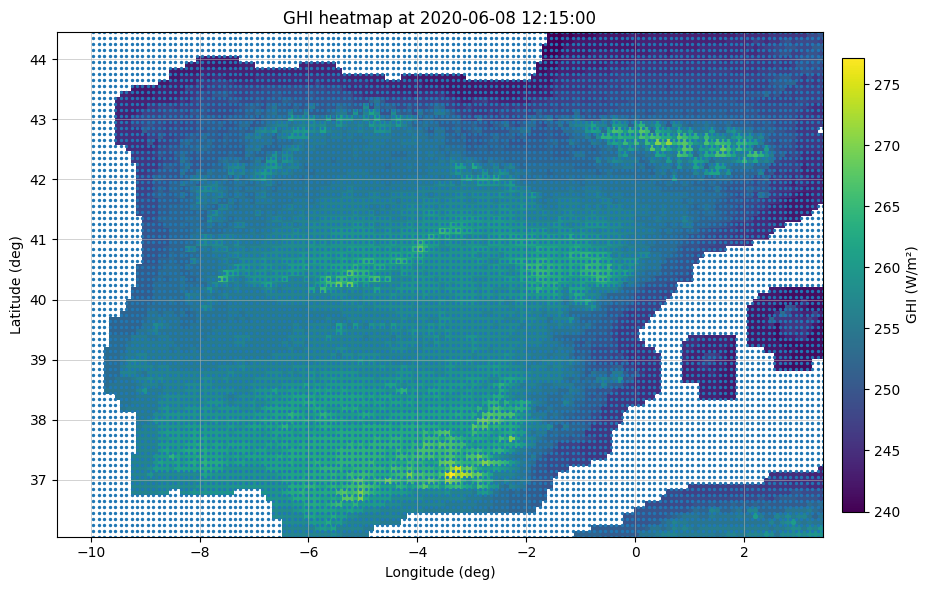

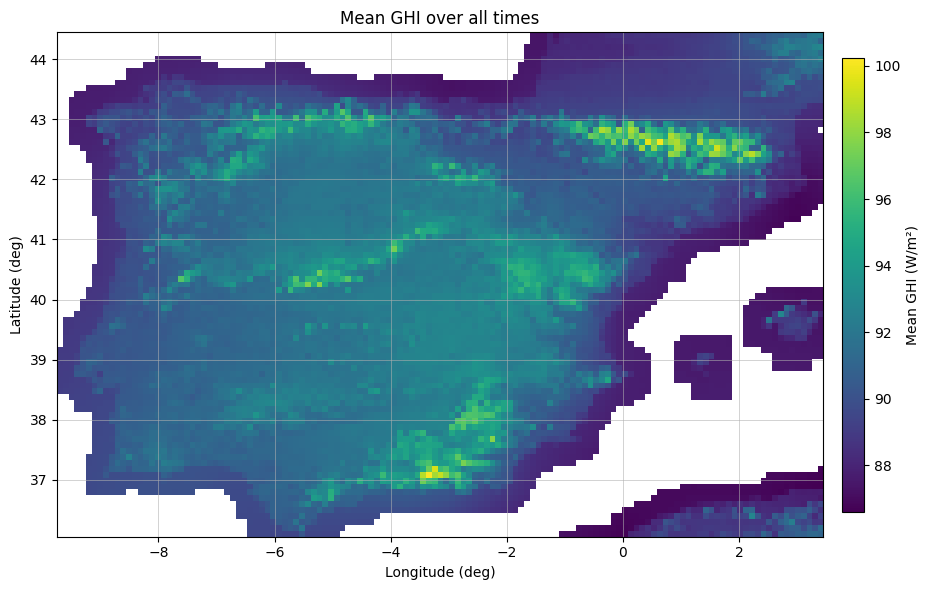

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

path = "output_data_irradiance.csv"
df = pd.read_csv(path)

# Choose which irradiance variable to plot: "GHI", "DHI", "BNI", "BHI"
var = "GHI"

# --- 1) A nice single-time map (auto-picks the time with highest mean irradiance) ---
best_time = df.groupby("time", sort=False)[var].mean().idxmax()
d = df[df["time"] == best_time].copy()

grid = (
    d.pivot_table(index="latitude", columns="longitude", values=var, aggfunc="mean")
     .sort_index()
)

lats = grid.index.to_numpy()
lons = grid.columns.to_numpy()
Z = grid.to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    Z,
    origin="lower",
    extent=[float(lons.min()), float(lons.max()), float(lats.min()), float(lats.max())],
    aspect="auto"
)
cb = plt.colorbar(im, ax=ax, pad=0.02, shrink=0.9)
cb.set_label(f"{var} (W/m²)")

# optional: overlay the grid points
ax.scatter(d["longitude"], d["latitude"], s=2)

ax.set_title(f"{var} heatmap at {best_time}")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.grid(True, linewidth=0.4)
plt.tight_layout()
plt.show()


# --- 2) Mean map over the whole dataset ---
mean_grid = (
    df.groupby(["latitude", "longitude"], as_index=False)[var].mean()
      .pivot_table(index="latitude", columns="longitude", values=var)
      .sort_index()
)

lats = mean_grid.index.to_numpy()
lons = mean_grid.columns.to_numpy()
Z = mean_grid.to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    Z,
    origin="lower",
    extent=[float(lons.min()), float(lons.max()), float(lats.min()), float(lats.max())],
    aspect="auto"
)
cb = plt.colorbar(im, ax=ax, pad=0.02, shrink=0.9)
cb.set_label(f"Mean {var} (W/m²)")

ax.set_title(f"Mean {var} over all times")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.grid(True, linewidth=0.4)
plt.tight_layout()
plt.show()


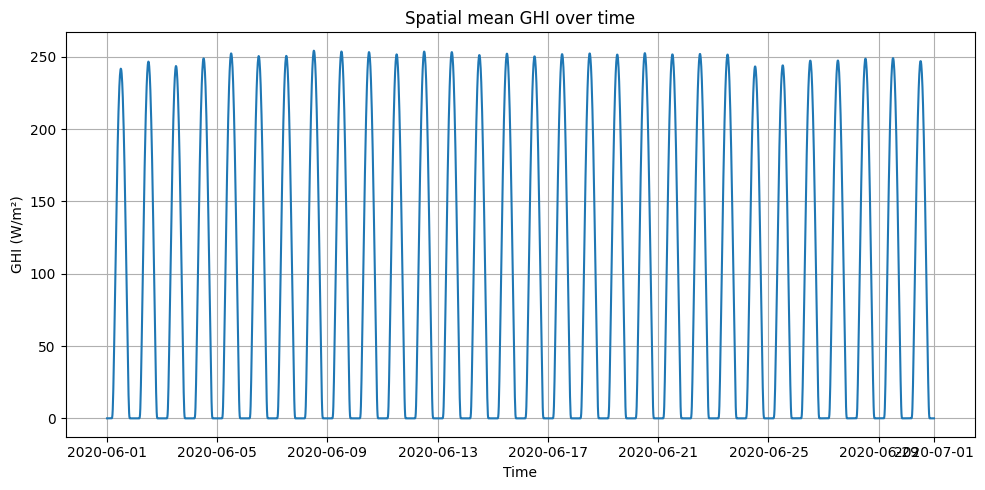

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("output_data_irradiance.csv")

# Parse time
df["time"] = pd.to_datetime(df["time"])

# Choose irradiance variable
var = "GHI"   # can be: "GHI", "DHI", "BNI", "BHI"

# Spatial mean over the domain
ts_mean = df.groupby("time")[var].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts_mean.index, ts_mean.values)
plt.xlabel("Time")
plt.ylabel(f"{var} (W/m²)")
plt.title(f"Spatial mean {var} over time")
plt.grid(True)

plt.tight_layout()
plt.show()


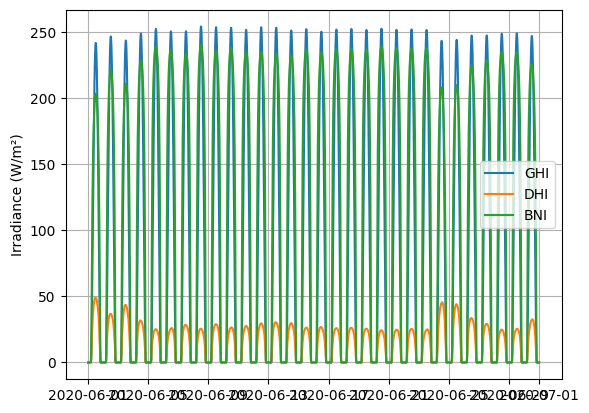

In [6]:
for v in ["GHI", "DHI", "BNI"]:
    plt.plot(df.groupby("time")[v].mean(), label=v)

plt.legend()
plt.ylabel("Irradiance (W/m²)")
plt.grid(True)
plt.show()




Temperature Heatmap for Your Region

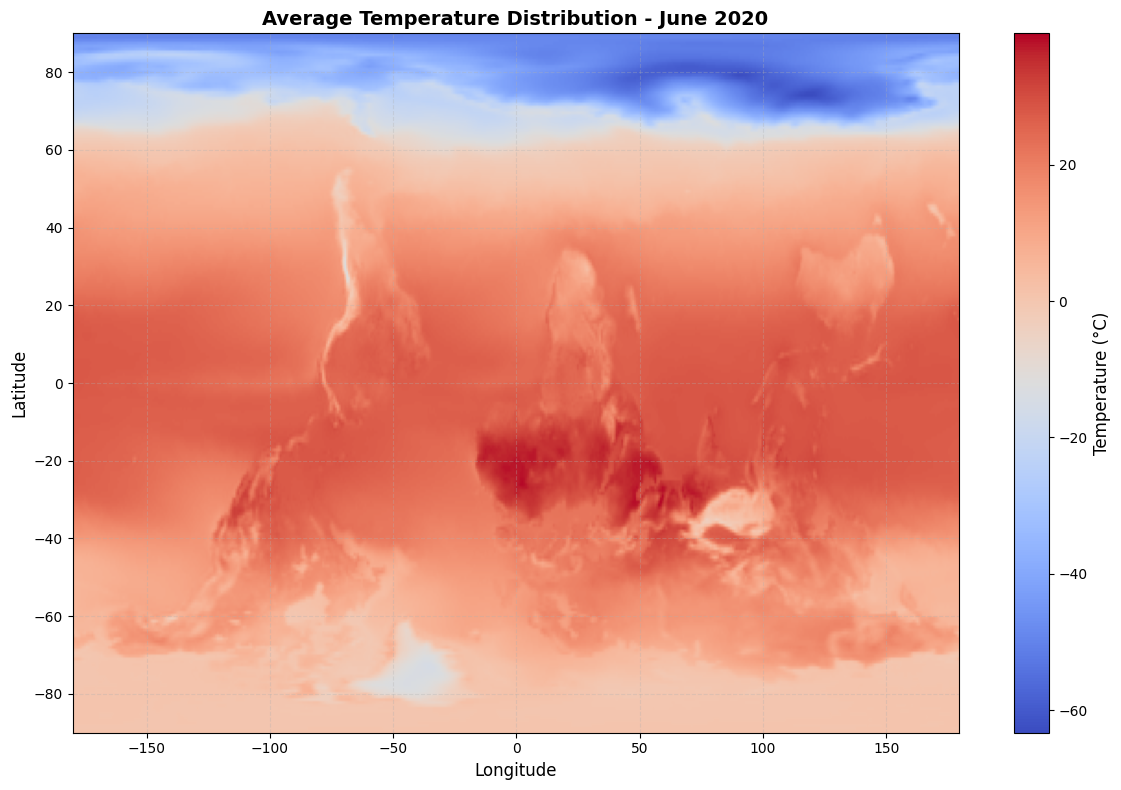

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_temperature is already loaded from your code
# Let's create a temperature heatmap

# Filter temperature data for June 2020 (your month of interest)
temp_data = df_temperature.copy()

# Pivot the data to create a grid for visualization
temp_pivot = temp_data.pivot_table(
    values='t2m',  # Temperature in Kelvin
    index='latitude',
    columns='longitude',
    aggfunc='mean'
)

# Convert from Kelvin to Celsius for easier interpretation
temp_pivot_celsius = temp_pivot - 273.15

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
im = plt.imshow(temp_pivot_celsius,
                cmap='coolwarm',
                aspect='auto',
                extent=[temp_pivot_celsius.columns.min(),
                       temp_pivot_celsius.columns.max(),
                       temp_pivot_celsius.index.min(),
                       temp_pivot_celsius.index.max()])

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Temperature (°C)', fontsize=12)

# Add labels and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Average Temperature Distribution - June 2020', fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add coastline if using cartopy (optional)
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines(resolution='10m')

plt.tight_layout()
plt.show()

In [ ]:
!pip install pvlib